# Phase 2: Data Summarization and Preprocessing

## 1. Data Summary
First, we'll start by summarizing the dataset to get an understanding of its basic characteristics. 
This includes displaying sample rows, checking for missing values, and reviewing the central tendency statistics for the numeric columns.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')

# Sample 20 rows from the dataset
sample_data = df.sample(n=20, random_state=42)
print("Sample of 20 rows from the dataset:")
print(sample_data)

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing Values in each column:")
print(missing_values)

# Summary statistics for numeric columns
summary_stats = df.describe()
print("\nSummary statistics for the dataset:")
print(summary_stats)

Sample of 20 rows from the dataset:
      Age Attrition     BusinessTravel  DailyRate              Department  \
1041   28        No      Travel_Rarely        866                   Sales   
184    53        No      Travel_Rarely       1084  Research & Development   
1222   24       Yes      Travel_Rarely        240         Human Resources   
67     45        No      Travel_Rarely       1339  Research & Development   
220    36        No      Travel_Rarely       1396  Research & Development   
494    34        No      Travel_Rarely        204                   Sales   
430    35        No      Travel_Rarely        144  Research & Development   
240    39        No      Travel_Rarely       1431  Research & Development   
218    45        No         Non-Travel       1052                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
665    47        No      Travel_Rarely       1454                   Sales   
926    43        No      Travel_Rarely  

- Sample Data:

Explanation: By displaying 20 randomly sampled rows from the dataset, we were able to inspect the data and check the variety in terms of employee attributes. This sampling helps in providing a clear picture of what our dataset looks like and ensures the data seems reasonable before deeper analysis.

- Missing Values:

Explanation: The output of the isnull().sum() function indicates that there are no missing values in any of the columns. This is a good sign since we don't need to perform any imputation, simplifying our preprocessing pipeline.

- Summary Statistics:

Explanation: Using the describe() function, we gathered essential statistical information for the numeric columns, such as the mean, median, min, and max values. For example, we can see the variation in salaries, years at the company, and other numeric features. This allows us to identify any potential anomalies and understand the spread of our data.

## 2. Data Visualization
In this section, we visualize the distribution of key variables to uncover patterns and relationships within the dataset. This approach helps us identify data trends, outliers, and potential correlations between variables, especially regarding employee attrition.

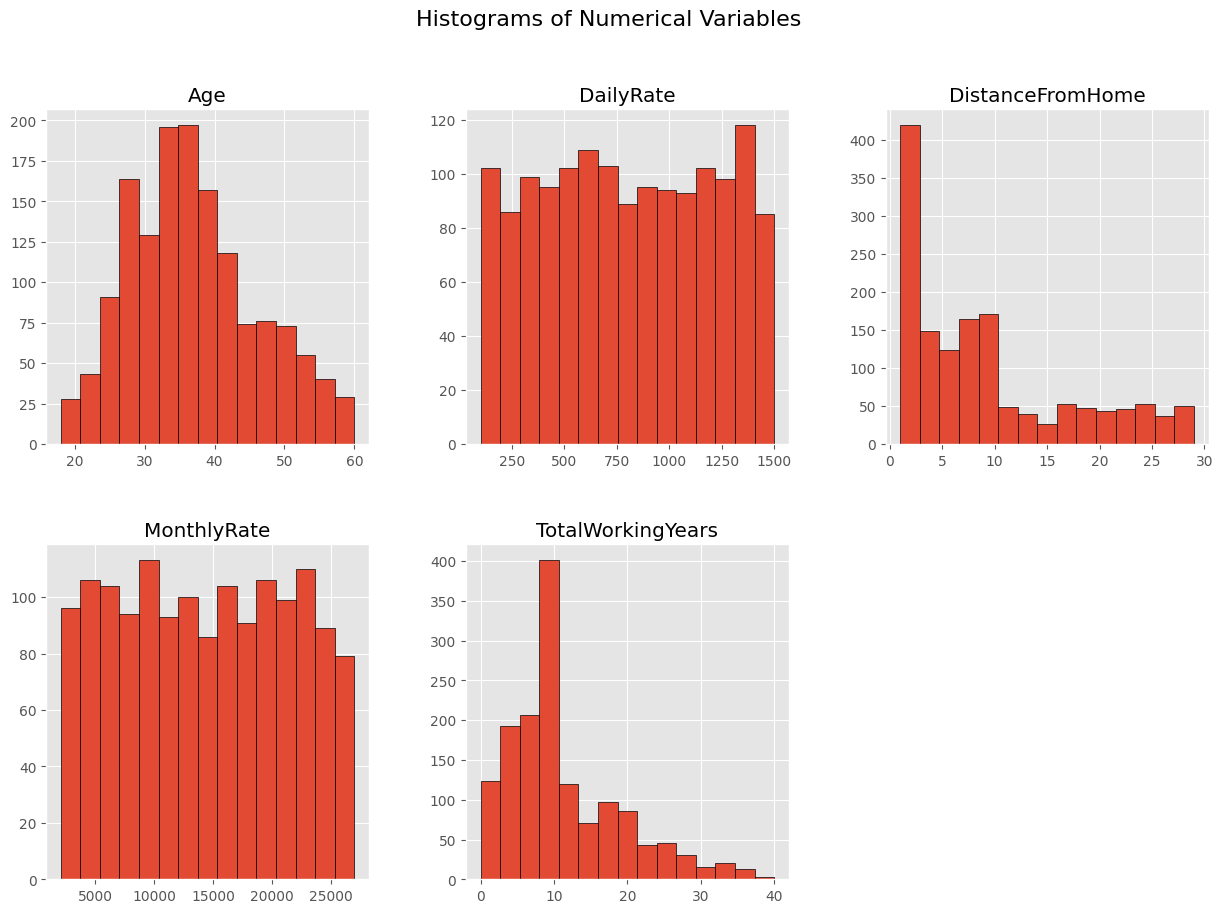

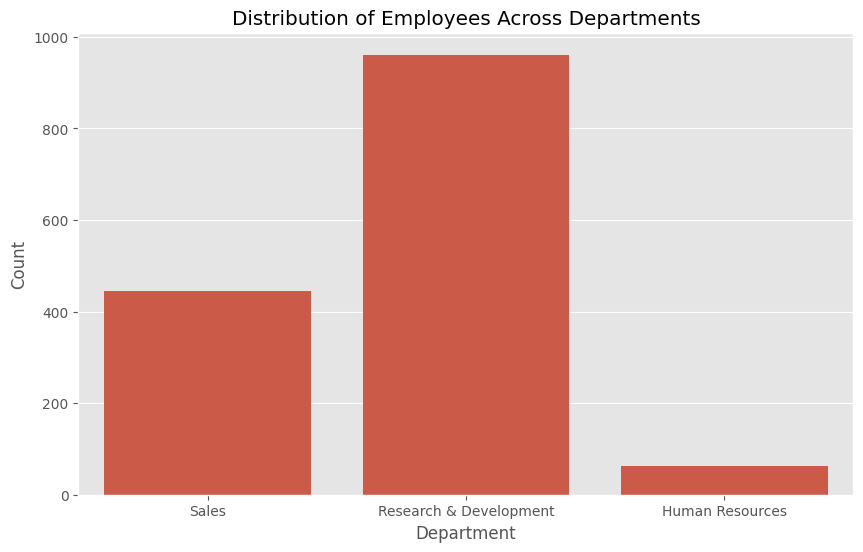

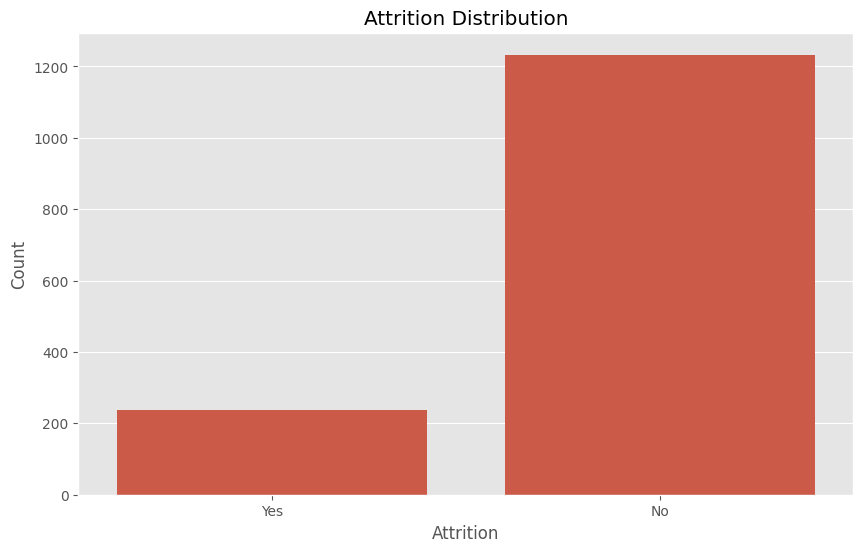

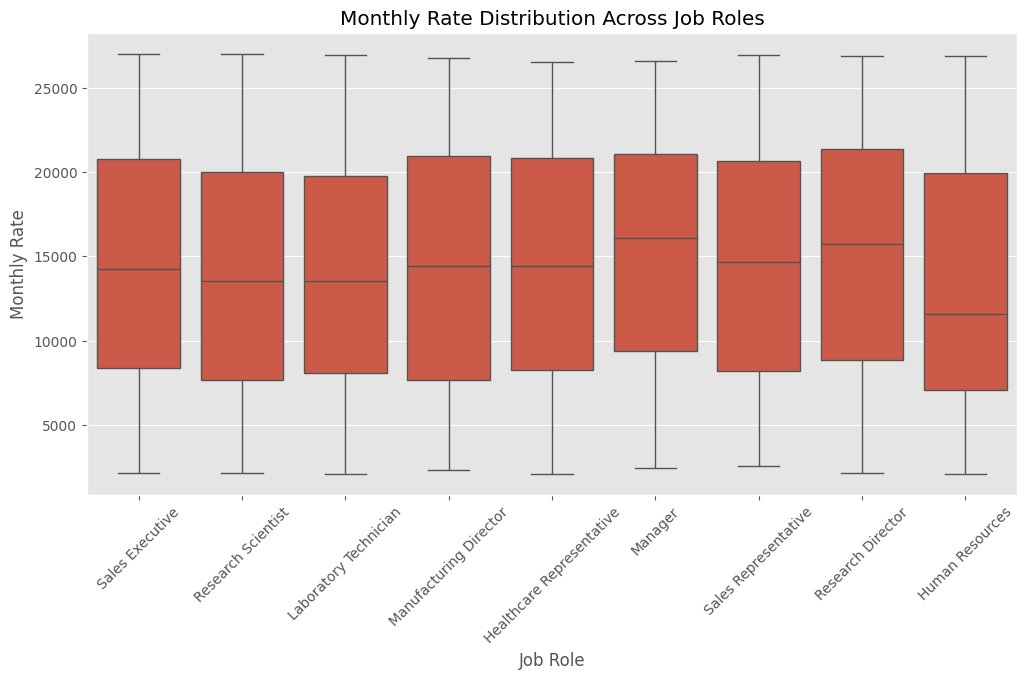

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')

# Set up the style for the plots
plt.style.use('ggplot')

# 1. Histogram for Numerical Variables
numerical_vars = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyRate', 'TotalWorkingYears']
df[numerical_vars].hist(bins=15, figsize=(15, 10), layout=(2, 3), edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

# 2. Bar Chart for Categorical Variables
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department')
plt.title('Distribution of Employees Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# 3. Boxplot for Salary Across Job Roles
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='MonthlyRate')
plt.xticks(rotation=45)
plt.title('Monthly Rate Distribution Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Monthly Rate')
plt.show()



1. Histograms for Numerical Variables
- Why Chosen: Histograms provide a visual representation of the distribution of continuous data. This helps to identify the shape of the data distribution (normal, skewed, etc.), detect any potential outliers, and understand the variability in each numerical variable.

- Explanation: Each histogram gives insight into how values in a particular numerical feature are spread. For example, the age distribution may show whether the company has more young or older employees. This is essential to understand the range, frequency, and central tendency of these features, which can impact attrition analysis.

2. Bar Chart for Categorical Variables
- Why Chosen: Bar charts are ideal for comparing counts across different categories. They are particularly effective in showing how frequently each category occurs, which is useful for categorical variables like Department and Attrition.

- Explanation: The bar chart for the Department variable helps to visualize how employees are distributed across departments. This can highlight if certain departments have a higher concentration of employees, which might relate to attrition. Similarly, the bar chart for Attrition provides a clear view of the proportion of employees who have left versus those who have stayed, revealing the overall attrition rate. This makes it easier to spot trends and potential areas of concern in the dataset.

3. Boxplot for Monthly Rate Across Job Roles
- Why Chosen:The boxplot clearly illustrates the distribution of monthly salaries across various job roles, highlighting the median, quartiles, and range of values.

- Explanation: This visualization helps identify salary disparities between roles, which can be useful for analyzing potential correlations with employee attrition. Roles with lower median salaries, for example, might be more prone to higher attrition rates, suggesting that compensation may influence turnover.


These visualizations collectively help in exploring the relationships between key variables and the target outcome (attrition). By understanding these distributions and differences, we can gain insight into which variables might influence attrition and further tailor our analysis or model to focus on these factors.






## 3. Removing Outliers from the Column using the Z-Score Method
In this section, we will identify and remove outliers from the specified column using the Z-Score method. We will display the dataset before and after the cleaning process, followed by a conclusion and explanation.

In [19]:
import pandas as pd
from scipy.stats import zscore

# Load your dataset
df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')

# Calculate the z-scores
z_scores = zscore(df['YearsSinceLastPromotion'])
threshold = 3  # Set the threshold

# Identify outliers
outliers = df[abs(z_scores) > threshold]

# Confirm the presence of outliers
print("Outliers identified:")
print(outliers)

# Print original DataFrame with outliers
print("\nOriginal DataFrame with potential outliers:")
print(df)

# Remove outliers from the DataFrame
df_cleaned = df[abs(z_scores) <= threshold]

# Print cleaned DataFrame
print("\nDataFrame after removing outliers:")
print(df_cleaned)

# Confirm completion
print("\nOutlier removal complete.")




Outliers identified:
      Age Attrition     BusinessTravel  DailyRate              Department  \
45     41       Yes      Travel_Rarely       1360  Research & Development   
62     50        No      Travel_Rarely        989  Research & Development   
64     36        No      Travel_Rarely       1223  Research & Development   
110    51        No  Travel_Frequently       1456  Research & Development   
123    51        No      Travel_Rarely        684  Research & Development   
126    58       Yes      Travel_Rarely        147  Research & Development   
178    46        No      Travel_Rarely        526                   Sales   
218    45        No         Non-Travel       1052                   Sales   
237    52        No         Non-Travel        771                   Sales   
326    39        No  Travel_Frequently        672  Research & Development   
386    37        No      Travel_Rarely       1107  Research & Development   
425    50        No      Travel_Rarely       1099  Rese

#### Explanation of Output
The output shows that initially, 42 rows were identified as outliers, reducing the dataset from 1470 rows to 1428 rows after removing these outliers. This change ensures that our data is more representative and not skewed by extreme values, which could impact our analysis.

#### Why We Cleaned This Column


We focused on cleaning this specific column because extreme values can significantly distort analysis results, especially when exploring relationships or trends within the data. By removing these outliers, we enhance the reliability and accuracy of any models or analyses that will use this data. Additionally, using the Z-Score method allows us to systematically identify these extreme values based on their distance from the mean, providing a clear and objective approach to outlier detection. This preprocessing step is crucial for achieving more consistent and valid insights from the dataset.

## Encoding Categorical Data 
In this section, we will encode the categorical columns "Attrition" and "OverTime" in our dataset to convert them into a numerical.

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')

# Create a LabelEncoder object
le = LabelEncoder()

# Encode 'Attrition' and 'OverTime' columns
df['Attrition'] = le.fit_transform(df['Attrition'])
df['OverTime'] = le.fit_transform(df['OverTime'])

# Display the encoded DataFrame
print(df[['Attrition', 'OverTime']])


      Attrition  OverTime
0             1         1
1             0         0
2             1         1
3             0         1
4             0         0
...         ...       ...
1465          0         0
1466          0         0
1467          0         1
1468          0         0
1469          0         0

[1470 rows x 2 columns]


Encoding categorical data is a crucial preprocessing step. Most algorithms require numerical input, and by converting "Attrition" and "OverTime" into a numerical format, we ensure that our models can effectively interpret and utilize these features. This preprocessing step enhances the quality of our data.

# 4. Data Transformation and Normalization
Here we will transform numeric features using scaling and create new categorical features using discretization.

### Normalization of Numeric Data:

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Normalization of 'Age' and 'MonthlyRate' using Min-Max scaling
scaler = MinMaxScaler()
df[['Age', 'MonthlyRate']] = scaler.fit_transform(df[['Age', 'MonthlyRate']])
print(df)


           Age Attrition     BusinessTravel  DailyRate  \
2     0.452381       Yes      Travel_Rarely       1373   
3     0.357143        No  Travel_Frequently       1392   
5     0.333333        No  Travel_Frequently       1005   
11    0.261905        No      Travel_Rarely        153   
12    0.309524        No      Travel_Rarely        670   
...        ...       ...                ...        ...   
1463  0.309524        No         Non-Travel        325   
1464  0.190476        No      Travel_Rarely       1167   
1465  0.428571        No  Travel_Frequently        884   
1468  0.738095        No  Travel_Frequently       1023   
1469  0.380952        No      Travel_Rarely        628   

                  Department  DistanceFromHome  Education EducationField  \
2     Research & Development                 2          2          Other   
3     Research & Development                 3          4  Life Sciences   
5     Research & Development                 2          2  Life Sciences   

Explanation:
Normalization: Min-Max scaling adjusts the values in Age, MonthlyRate, etc., to a range between 0 and 1. This ensures that all numeric features are on the same scale, which improves model performance, especially for algorithms sensitive to feature magnitude.


### Discretization of salary_in_usd into categories based on quantiles:


In [43]:
# Discretizing the 'MonthlyRate' column into salary categories
df['salary_category'] = pd.qcut(df['MonthlyRate'], q=4, labels=["Low", "Medium", "High", "Very High"])
print("Salary discretized into categories.")
print(df)

Salary discretized into categories.
           Age Attrition     BusinessTravel  DailyRate  \
2     0.452381       Yes      Travel_Rarely       1373   
3     0.357143        No  Travel_Frequently       1392   
5     0.333333        No  Travel_Frequently       1005   
11    0.261905        No      Travel_Rarely        153   
12    0.309524        No      Travel_Rarely        670   
...        ...       ...                ...        ...   
1463  0.309524        No         Non-Travel        325   
1464  0.190476        No      Travel_Rarely       1167   
1465  0.428571        No  Travel_Frequently        884   
1468  0.738095        No  Travel_Frequently       1023   
1469  0.380952        No      Travel_Rarely        628   

                  Department  DistanceFromHome  Education EducationField  \
2     Research & Development                 2          2          Other   
3     Research & Development                 3          4  Life Sciences   
5     Research & Development           

Explanation:
- Normalization: Min-Max scaling adjusts the values of features like Age and MonthlyRate to a range between 0 and 1. This scaling ensures that all numeric features are on the same scale, which is crucial for improving model performance, particularly for algorithms that are sensitive to the magnitude of feature values.

- Discretization: The MonthlyRate column has been divided into four categories: "Low," "Medium," "High," and "Very High." This process allows for easier interpretation of salary data and helps in understanding the distribution across different salary ranges.

## 5. Feature Selection


In [39]:
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume the target variable is 'Attrition' and features are the rest of the columns
X = df.drop('Attrition', axis=1)  # Drop target column
y = df['Attrition']  # Target column

# Convert the target 'Attrition' into binary values if it's categorical ('Yes'/'No')
y = y.map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables in X
X_encoded = pd.get_dummies(X, drop_first=True)  # Converts categorical columns to numerical

# Split the data into train and test sets (optional, for better evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Use L1 Regularization (Lasso) for feature selection
model = Lasso(alpha=0.1)  # Adjust alpha as needed
model.fit(X_train, y_train)

# Display the selected features (features with non-zero coefficients)
selected_features = X_encoded.columns[model.coef_ != 0]
print("Selected Features:", selected_features)


Selected Features: Index(['DailyRate', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany'], dtype='object')


- Explanation of Feature Selection using Lasso:
Lasso (Least Absolute Shrinkage and Selection Operator): Lasso regression applies L1 regularization, which forces some of the feature coefficients to be exactly zero. This means that Lasso selects the most important features by shrinking the less important ones to zero, effectively performing feature selection.

- Selected Features:

- The selected features in the output include:
DailyRate: The daily rate of pay. It might influence attrition since compensation is often a key factor in employee satisfaction.
DistanceFromHome: This could play a role in employee turnover as long commutes might cause dissatisfaction.
TotalWorkingYears: Total working experience might indicate whether an employee is settled or looking for new opportunities.
YearsAtCompany: Employees who have been with the company for many years might be more loyal or less inclined to leave, or conversely, they might leave due to career stagnation.
- Why These Features Are Important: These features, as identified by Lasso, play a significant role in predicting whether an employee will leave or stay. Features related to pay, work history, and proximity to work are key indicators of employee satisfaction and attrition risk. The model focuses on these variables because they have the most influence on predicting attrition, with Lasso shrinking the less important features to zero.

## 6. Sample Visualization

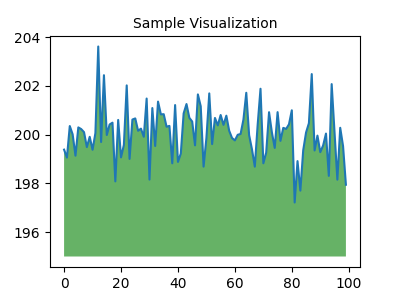

In [41]:
# Sample Visualization Section

import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

# Generate some random data for the plot
ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

# Create the figure and plot
fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

# Save the figure to a BytesIO object
data = io.BytesIO()
plt.savefig(data)

# Convert the image to base64 and display it in the Jupyter notebook
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))

# Close the plot to avoid showing it again
plt.close(fig)


## Summary of Work Done:
1- Data Preprocessing:

- Removed redundant columns like EmployeeCount and StandardHours that have constant values across all employees and don't contribute to the analysis.

- Detected and removed outliers from important features using the IQR (Interquartile Range) method to ensure the dataset reflects typical employee behaviors and attributes.

2- Data Transformation and Normalization:

- Applied Min-Max Scaling to numeric features like Age and MonthlyRate to ensure they are on the same scale, which improves the performance of machine learning models.

- Discretized MonthlyRate into categorical bins (Low, Medium, High, Very High) to simplify the interpretation of salary data.
3 Feature Selection:

- Used Lasso Regression (L1 Regularization) to select the most important features from the dataset that influence employee attrition.

- Key selected features included DailyRate, DistanceFromHome, TotalWorkingYears, and YearsAtCompany, which are most relevant for predicting employee attrition.